## Energy Efficiency on Building

Data dari UCI Machine Learning: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

Informasi Data:
    
    X1 = Relative Compactness
    X2 = Surface Area - m²
    X3 = Wall Area - m²
    X4 = Roof Area - m²
    X5 = Overall Height - m
    X6 = Orientation - 2:North, 3:East, 4:South, 5:West
    X7 = Glazing Area - 0%, 10%, 25%, 40% (of floor area)
    X8 = Glazing Area Distribution (Variance) - 1:Uniform, 2:North, 3:East, 4:South, 5:West
    Y1 = Heating Load - kWh/m²
    Y2 = Cooling Load - kWh/m²

Project ini akan mempelajari pengaruh delapan variabel input (Relative Compactness, Luas Permukaan, Luas Dinding, Luas Atap, Tinggi Keseluruhan, Orientasi, Luas Kaca, dan Distribusi Luas Kaca) yang dilambangkan sebagai X1, X2, ..., X8, terhadap dua variabel respon, yaitu beban pemanas (Y2) dan beban pendingin (Y2) dari bangunan tempat tinggal. Beban pemanas dan beban pendingin adalah jumlah energi yang diperlukan untuk ditambahkan atau dihapus dari ruangan untuk menjaga penghuni agar tetap nyaman.

Tujuan project ini untuk menyelidiki variabel apa saja yang berpengaruh signifikan terhadap dua variabel respon.

### Mengimpor Fungsi dari Libraries dan Memuat Dataset

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from wordcloud import WordCloud
%matplotlib inline

In [66]:
df = pd.read_csv("test.csv")
df.head()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
RelativeCompactness        768 non-null float64
SurfaceArea                768 non-null float64
WallArea                   768 non-null float64
RoofArea                   768 non-null float64
OverallHeight              768 non-null float64
Orientation                768 non-null int64
GlazingArea                768 non-null float64
GlazingAreaDistribution    768 non-null int64
HeatingLoad                768 non-null float64
CoolingLoad                768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [68]:
df.describe()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [69]:
print("Set Total Row Number: {0} \nSet Total Col Number: {1}".format(df.shape[0], df.shape[1]))

Set Total Row Number: 768 
Set Total Col Number: 10


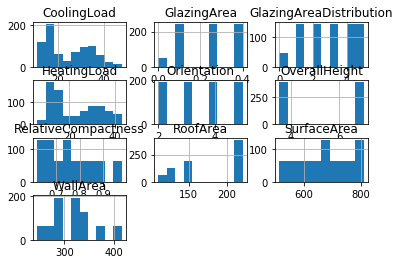

In [70]:
viz = df[['RelativeCompactness','SurfaceArea','WallArea','RoofArea','OverallHeight','Orientation','GlazingArea','GlazingAreaDistribution','HeatingLoad','CoolingLoad']]
viz.hist()
plt.show()

Perkiraan probabilitas menggunakan histogram dari delapan variabel input dan variabel output Y1 dan Y2

In [71]:
df.dtypes

RelativeCompactness        float64
SurfaceArea                float64
WallArea                   float64
RoofArea                   float64
OverallHeight              float64
Orientation                  int64
GlazingArea                float64
GlazingAreaDistribution      int64
HeatingLoad                float64
CoolingLoad                float64
dtype: object

### Data Visualisasi

Mevisualisasikan Data Orientation dan Glazing Area Distribution dengan model pie chart karena data berupa kategori.

In [72]:
train_types = df["Orientation"].value_counts()
train_types1 = df["GlazingAreaDistribution"].value_counts()

In [73]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(
    go.Pie(values=train_types, labels=train_types.index.tolist(), name="Orientation" , hole=.3),
              1, 1)

fig.update_traces(hoverinfo='label+percent+value', textinfo='percent', textfont_size=17, textposition="inside",
                  marker=dict(colors=['gold', 'mediumturquoise', 'darkorange', 'plum'],  
                              line=dict(color='#000000', width=2)
                             )
                 )

fig.update_layout(
    title_text="Orientation",
    height=500, width=800,
    annotations=[dict(text='Orientation', x=0.18, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

In [74]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(
    go.Pie(values=train_types1, labels=train_types1.index.tolist(), name="Glazing Area Distribution" , hole=.3),
              1, 1)

fig.update_traces(hoverinfo='label+percent+value', textinfo='percent', textfont_size=17, textposition="inside",
                  marker=dict(colors=['gold', 'mediumturquoise', 'darkorange', 'plum'],  
                              line=dict(color='#000000', width=2)
                             )
                 )

fig.update_layout(
    title_text="Glazing Area Distributon",
    height=500, width=800,
    annotations=[dict(text='GAD', x=0.18, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

### Mencari Linearnya Variabel

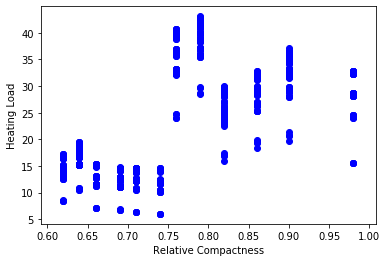

In [75]:
plt.scatter(df.RelativeCompactness, df.HeatingLoad,  color='blue')
plt.xlabel("Relative Compactness")
plt.ylabel("Heating Load")
plt.show()

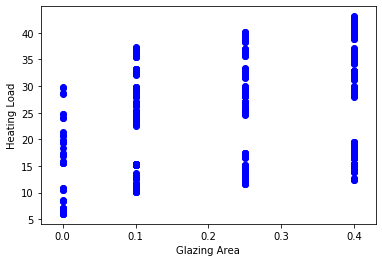

In [76]:
plt.scatter(df.GlazingArea, df.HeatingLoad,  color='blue')
plt.xlabel("Glazing Area")
plt.ylabel("Heating Load")
plt.show()

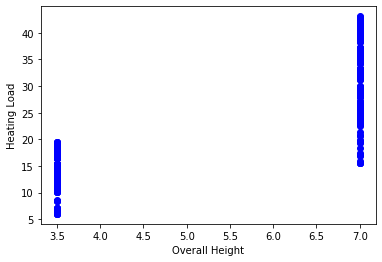

In [77]:
plt.scatter(df.OverallHeight, df.HeatingLoad,  color='blue')
plt.xlabel("Overall Height")
plt.ylabel("Heating Load")
plt.show()

Berdasarkan hasil plot scatter tidak kelihat varibel x yang mempengaruhi variabel y. Maka akan dilakukan dengan menggunakna heatingmap.

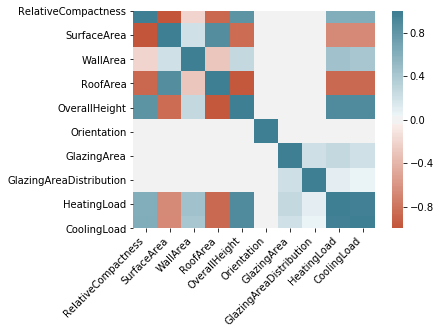

In [78]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Berdasarkan heatmap, variabel yang paling berpengaruh adalah variabel "Overall Height" dengan korelasi tertinggi positif dan "Roof Area" dengan korelasi tertinggi negatif.

### Modeling Data 

In [85]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [86]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['OverallHeight']])
train_y = np.asanyarray(train[['HeatingLoad']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[5.0606739]]
Intercept:  [-4.32946474]


Text(0, 0.5, 'Heating Load')

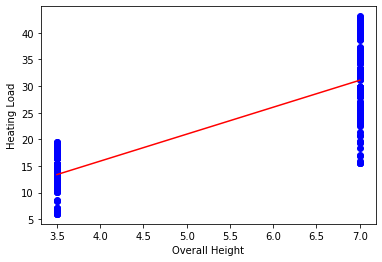

In [87]:
plt.scatter(train.OverallHeight, train.HeatingLoad,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Overall Height")
plt.ylabel("Heating Load")

In [88]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['OverallHeight']])
test_y = np.asanyarray(test[['HeatingLoad']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 3.70
Residual sum of squares (MSE): 22.85
R2-score: 0.71


In [89]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['RoofArea']])
train_y = np.asanyarray(train[['HeatingLoad']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.19021417]]
Intercept:  [55.75295675]


Text(0, 0.5, 'Heating Load')

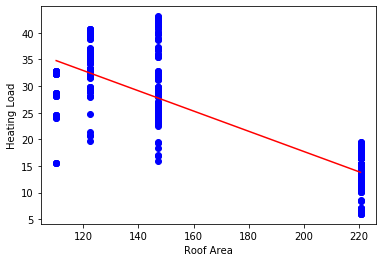

In [91]:
plt.scatter(train.RoofArea, train.HeatingLoad,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Roof Area")
plt.ylabel("Heating Load")

In [92]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['RoofArea']])
test_y = np.asanyarray(test[['HeatingLoad']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 4.21
Residual sum of squares (MSE): 32.44
R2-score: 0.53


### Coefficients Variabel

In [93]:
import pandas as pd

In [109]:
cdf=pd.DataFrame(df, columns= ['RelativeCompactness','SurfaceArea','WallArea','RoofArea','OverallHeight','Orientation','GlazingArea','GlazingAreaDistribution','HeatingLoad','CoolingLoad'])
Xb=cdf.drop(['OverallHeight','HeatingLoad'],axis=1)
Yb=cdf['HeatingLoad']

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
Xb_train, Xb_test, Yb_train, Yb_test=train_test_split(Xb,Yb)
from sklearn.linear_model import LinearRegression

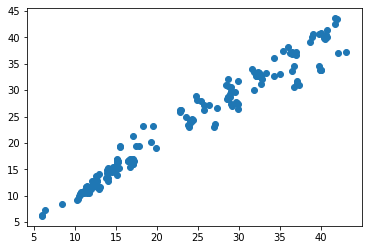

In [112]:
lm=LinearRegression()
lm.fit(Xb_train,Yb_train)
Ytopi=lm.predict(Xb_test)
plt.scatter(Yb_test,Ytopi)
plt.show()

In [113]:
from sklearn import metrics

In [114]:
coeff_df = pd.DataFrame(lm.coef_, Xb.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
RelativeCompactness,-2.981677e+01
SurfaceArea,-7.558051e+10
WallArea,7.558051e+10
RoofArea,1.511610e+11
Orientation,-1.189175e-01
GlazingArea,9.156506e+00
GlazingAreaDistribution,1.208527e-01
CoolingLoad,7.465606e-01


### Kesimpulan :

Berdasarkan output heatmap diatas maka efisiensi kedua beban yaitu beban pemanas dan pendingin dipengaruhi oleh variabel X5 yang signifikan yaitu Overall Height atau tinggi keseluruhan gedung.

Ketika X5 semakin besar, maka Y1 (Beban Pemanas) dan Y2 (Beban Pendingin) akan besar begitupun sebaliknya.